INTERVALAS: [a, b] = [-3.0, 2.0]
Mazgų skaičius n = 15

Tolygiai išdėstyti mazgai (x_i):
 [-3.      , -2.642857, -2.285714, -1.928571, -1.571429, -1.214286,
 -0.857143, -0.5     , -0.142857,  0.214286,  0.571429,  0.928571,
  1.285714,  1.642857,  2.      ]
Atitinkamos reikšmės (y_i = f(x_i)):
 [-3.051568e-04, -3.372053e-03,  2.480345e-02,  6.527485e-02, -2.409341e-01,
 -9.601610e-01, -1.240225e+00, -6.743744e-01, -6.283987e-02, -1.221317e-01,
 -5.619778e-01, -6.640766e-01, -3.271121e-01, -3.910425e-02,  1.386132e-02]

Čiobyševo abscisės (perskaičiuotos į [a,b]) (x_i):
 [ 1.986305,  1.877641,  1.665064,  1.357862,  0.969463,  0.516842,
  0.019779, -0.5     , -1.019779, -1.516842, -1.969463, -2.357862,
 -2.665064, -2.877641, -2.986305]
Atitinkamos reikšmės (y_i = f(x_i)):
 [ 1.411811e-02,  1.237529e-02, -3.010978e-02, -2.501924e-01, -6.405667e-01,
 -5.018005e-01, -1.165459e-03, -6.743744e-01, -1.225338e+00, -3.371783e-01,
  6.906861e-02,  1.366079e-02, -3.406846e-03, -1.355388e-03, -3.8

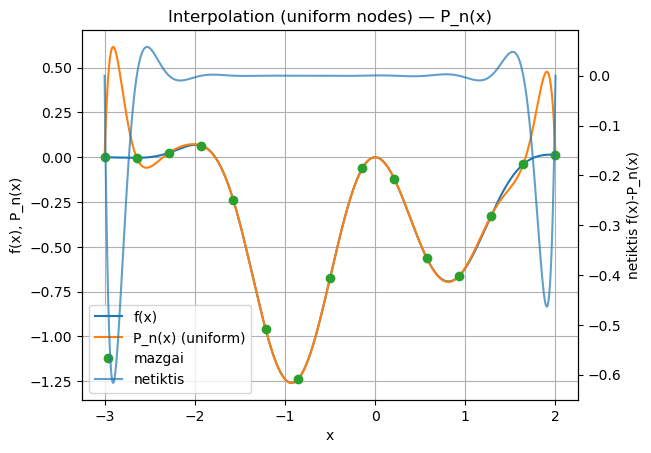

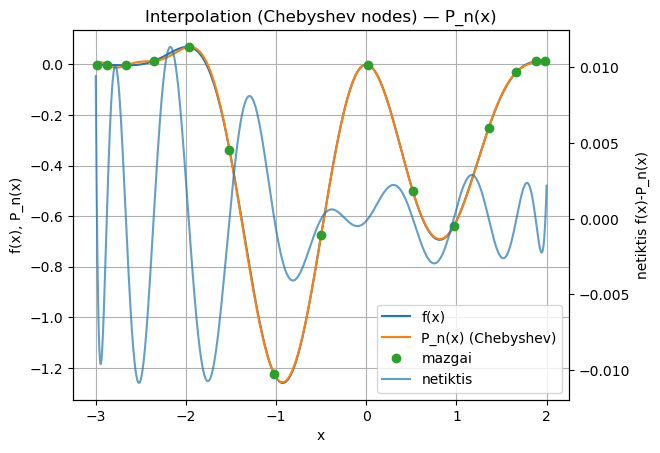

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

# ------------------------ Parametrai ------------------------
a, b = -3.0, 2.0
n = 15
m = 1000

# ------------------------ Duotoji funkcija ------------------------
def f(x):
    # f(x) = e^{-x^2} * sin(x^2) * (x - 3)
    return np.exp(-x**2) * np.sin(x**2) * (x - 3.0)

# ------------------------ Pagalbinės funkcijos ------------------------
def chebyshev_nodes_on_interval(a, b, n):
    # Sukuriame sveikų skaičių masyvą i = [0, 1, 2, ..., n-1]
    i = np.arange(n)
    xi = np.cos((2*i + 1) * math.pi / (2*n))   # Čiobyševo mazgai intervale [-1,1] pagal formule
    return (a + b)/2 + (b - a)/2 * xi          # linijinis pernešimas į [a,b]

def uniform_nodes(a, b, n):
    """Sugeneruoja n tolygiai išdėstytų mazgų intervale [a,b]."""
    # Grąžina masyvą [a, ..., b] iš n vienodai atskirtų taškų
    return np.linspace(a, b, n)

def lagrange_classic(x_nodes, y_nodes, x_eval):
    x_nodes = np.asarray(x_nodes, dtype=float)
    y_nodes = np.asarray(y_nodes, dtype=float)
    x_eval  = np.atleast_1d(x_eval).astype(float)

    n = len(x_nodes)
    P = np.zeros_like(x_eval)

    # Einame per visus bazinius daugianarius L_i(x)
    for i in range(n):
        # Pradinė L_i(x) reikšmė = 1 visiems x_eval taškams
        Li = np.ones_like(x_eval)
        xi = x_nodes[i]
        for j in range(n):         # skaičiuojame sandaugą per visus j != i
            if j == i:
                continue
            Li *= (x_eval - x_nodes[j]) / (xi - x_nodes[j])  # daugindami sudarom L_i(x) pagal formule
        P += y_nodes[i] * Li       # P(x) += y_i * L_i(x)
    return P if P.ndim > 0 else P.item()

def lagrange_expression_text(x_nodes, y_nodes, max_terms_to_show=None):
    x_nodes = np.asarray(x_nodes, dtype=float)
    y_nodes = np.asarray(y_nodes, dtype=float)
    n = x_nodes.size
    if max_terms_to_show is None:
        max_terms_to_show = n

    lines = []
    lines.append(
        "P(x) = Σ_{i=0}^{%d} y_i · L_i(x), kur L_i(x) = ∏_{j≠i} (x - x_j)/(x_i - x_j)"
        % (n-1)
    )
    shown = min(n, max_terms_to_show)
    for i in range(shown):
        xi = x_nodes[i]
        yi = y_nodes[i]
        # prod - elementu daugyba
        denom_val = np.prod([xi - x_nodes[j] for j in range(n) if j != i])
        lines.append(
            f"Termas i={i}: y_{i}= {yi:.6g};  L_{i}(x) = "
            + " · ".join([f"(x - {x_nodes[j]:.6g})" for j in range(n) if j != i])
            + f" / ({denom_val:.6g})"
        )
    if shown < n:
        lines.append(f"... (rodyti tik pirmi {shown} iš {n} narių)")
    return "\n".join(lines)

# ------------------------ Mazgai ------------------------
x_uni = uniform_nodes(a, b, n)        # sugeneruojam tolygius mazgus [a,b]
x_che = chebyshev_nodes_on_interval(a, b, n)  # sugeneruojam Čiobyševo mazgus [a,b]
y_uni = f(x_uni)                      # apskaičiuojam f(x_i) tolygiems mazgams
y_che = f(x_che)                      # apskaičiuojam f(x_i) Čiobyševo mazgams

# ------------------------ Vertinimo tinklelis ------------------------
xx = np.linspace(a, b, m)
ff = f(xx)

# ------------------------ Interpoliantai (KLASIKINĖ forma) ------------------------
pp_uni = lagrange_classic(x_uni, y_uni, xx)   # P_n(x) su tolygiais mazgais
pp_che = lagrange_classic(x_che, y_che, xx)   # P_n(x) su Čiobyševo mazgais

err_uni = ff - pp_uni                 # klaida f(x) - P_n(x) uniform mazgams
err_che = ff - pp_che                 # klaida f(x) - P_n(x) Čiobyševo mazgams

# ------------------------ Spausdiname pagrindinius rezultatus ------------------------
print("INTERVALAS: [a, b] = [%.1f, %.1f]" % (a, b))
print("Mazgų skaičius n =", n)
print("\nTolygiai išdėstyti mazgai (x_i):\n",
      np.array2string(x_uni, precision=6, separator=', '))
print("Atitinkamos reikšmės (y_i = f(x_i)):\n",
      np.array2string(y_uni, precision=6, separator=', '))
print("\nČiobyševo abscisės (perskaičiuotos į [a,b]) (x_i):\n",
      np.array2string(x_che, precision=6, separator=', '))
print("Atitinkamos reikšmės (y_i = f(x_i)):\n",
      np.array2string(y_che, precision=6, separator=', '))
print("\nMaksimali absoliuti paklaida |f - P_uni|:", np.max(np.abs(err_uni)))
print("Maksimali absoliuti paklaida |f - P_che|:", np.max(np.abs(err_che)))
print("\n--- Interpolianto išraiška (Lagrange forma, tolygūs mazgai) ---")
print(lagrange_expression_text(x_uni, y_uni, max_terms_to_show=5))
print("\n--- Interpolianto išraiška (Lagrange forma, Čiobyševo mazgai) ---")
print(lagrange_expression_text(x_che, y_che, max_terms_to_show=5))

# ------------------------ Grafikai ------------------------
# 1) Tolygiai išdėstyti mazgai
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.set_title("Interpolation (uniform nodes) — P_n(x)")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x), P_n(x)")
ax1.grid(True)

# Duotoji funkcija ir interpoliantas
ax1.plot(xx, ff, label="f(x)")
ax1.plot(xx, pp_uni, label="P_n(x) (uniform)")
ax1.plot(x_uni, y_uni, linestyle="", marker="o", label="mazgai")

# Klaida ant antros ašies
ax1b = ax1.twinx()
ax1b.set_ylabel("netiktis f(x)-P_n(x)")
ax1b.plot(xx, err_uni, label="netiktis", alpha=0.7)

# Bendra legenda iš abiejų ašių
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax1b.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="best")

# 2) Čiobyševo mazgai
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.set_title("Interpolation (Chebyshev nodes) — P_n(x)")
ax2.set_xlabel("x")
ax2.set_ylabel("f(x), P_n(x)")
ax2.grid(True)

# Duotoji funkcija ir interpoliantas
ax2.plot(xx, ff, label="f(x)")
ax2.plot(xx, pp_che, label="P_n(x) (Chebyshev)")
ax2.plot(x_che, y_che, linestyle="", marker="o", label="mazgai")

# Klaida ant antros ašies
ax2b = ax2.twinx()
ax2b.set_ylabel("netiktis f(x)-P_n(x)")
ax2b.plot(xx, err_che, label="netiktis", alpha=0.7)

# Bendra legenda ir čia
h1, l1 = ax2.get_legend_handles_labels()
h2, l2 = ax2b.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc="best")

plt.show()